In [30]:
import numpy as np
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
from rasterio.plot import show
from matplotlib import colors
import matplotlib as mpl
from matplotlib.colors import ListedColormap

In [ ]:
## SOCIO-ECONOMIC VULNERABILITY TO FLOODING

In [9]:
# Path to your village boundaries (shapefile or GeoJSON)
boundary_file = '/home/jupyter-edufitimana/Data/village.shp'
# Path to the raster file (GeoTIFF or other supported format)
raster_file = '/home/jupyter-edufitimana/Data/SEV.tif'

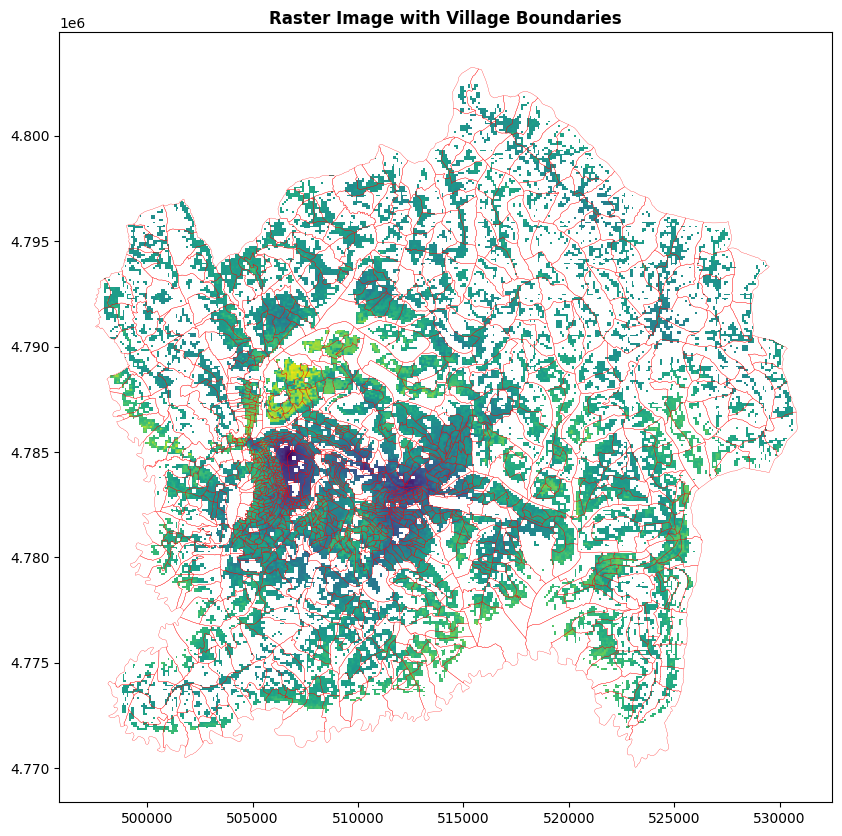

In [12]:
# Load village boundaries using GeoPandas
villages = gpd.read_file(boundary_file)

# Load raster data using Rasterio
with rasterio.open(raster_file) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the raster image
    show(src, ax=ax, title="Raster Image with Village Boundaries")
    
    # Overlay village boundaries
    villages.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=0.2)
    
    # Show the plot
    plt.show()


In [14]:
# Load village boundaries using GeoPandas
villages = gpd.read_file(boundary_file)

# Extract aggregated raster values for each village (mean, sum, min, max, etc.)
# You can change the 'stats' parameter to other types of stats like ['mean', 'sum', 'min', 'max']
zonal_stats_result = zonal_stats(villages, raster_file, stats=['mean', 'sum'], geojson_out=True)

# Create a GeoDataFrame from the result with aggregated values
zonal_stats_gdf = gpd.GeoDataFrame.from_features(zonal_stats_result)

In [15]:
zonal_stats_gdf.head()

,geometry,fid1,fid_,OBJECTID,SUM_Popula,SUM_Househ,District,Sector_1,Cellule_1,Population,Household,Village,UR_Name,mean,sum
0,"POLYGON Z ((505804.107 4784697.389 0.000, 5058...",0,0,1,730.0,151.0,Nyarugenge,Gitega,Akabahizi,730.0,151.0,Gihanga,NyarugengeUrban area,0.523718,143.498840
1,"POLYGON Z ((505725.350 4785070.958 0.000, 5057...",0,0,2,667.0,187.0,Nyarugenge,Gitega,Akabahizi,334.0,97.0,Iterambere,NyarugengeUrban area,0.476248,304.322266
2,"POLYGON Z ((505689.339 4785047.219 0.000, 5057...",0,0,3,670.0,160.0,Nyarugenge,Gitega,Akabahizi,670.0,160.0,Izuba,NyarugengeUrban area,0.637486,89.248001
3,"POLYGON Z ((506082.393 4784751.671 0.000, 5060...",0,0,4,293.0,72.0,Nyarugenge,Gitega,Akabahizi,293.0,72.0,Nyaburanga,NyarugengeUrban area,0.477803,153.852554
4,"POLYGON Z ((505779.444 4784753.812 0.000, 5057...",0,0,5,719.0,189.0,Nyarugenge,Gitega,Akabahizi,472.0,125.0,Nyenyeri,NyarugengeUrban area,0.551847,77.258598


In [16]:
# Optional: Save the result to a new shapefile or GeoJSON
zonal_stats_gdf.to_file("/home/jupyter-edufitimana/Data/village_stats.shp")

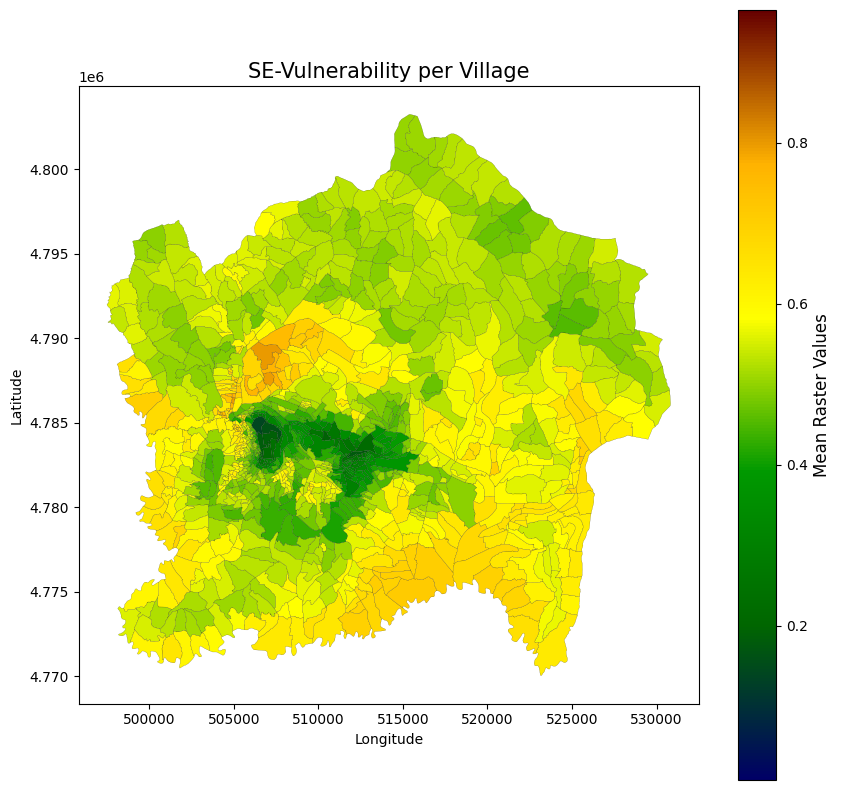

In [102]:
# Remove any null values in the 'mean' column (if any)
zonal_stats_gdf = zonal_stats_gdf.dropna(subset=['mean'])

# Plotting the result with a color ramp based on 'mean' values
fig, ax = plt.subplots(figsize=(10, 10))

# Define the colors from dark blue (low) to brown (high)
colors = [(0, 0, 0.4),  # Dark Blue
          (0, 0.4, 0),  # Dark Green
          (0, 0.6, 0),  # Greenish
          (1, 1, 0),    # Yellow
          (1, 0.7, 0),  # Orange
          (0.4, 0, 0)]  # Brown

# Create the custom colormap
cmap_name = 'custom_gradient'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# Plot the village boundaries with color based on mean values
zonal_stats_gdf.plot(column='mean', cmap=cmap, linewidth=0.1, edgecolor='black', ax=ax, legend=False, norm=norm)

# Add the color bar (the color ramp)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Mean Raster Values', fontsize=12)

# Add title and labels
ax.set_title('SE-Vulnerability per Village', fontsize=15)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [49]:
##FLOOD SUSCEPTIBILITY

In [50]:
# Path to the raster file (GeoTIFF or other supported format)
raster = '/home/jupyter-edufitimana/Data/suscept_nor.tif'

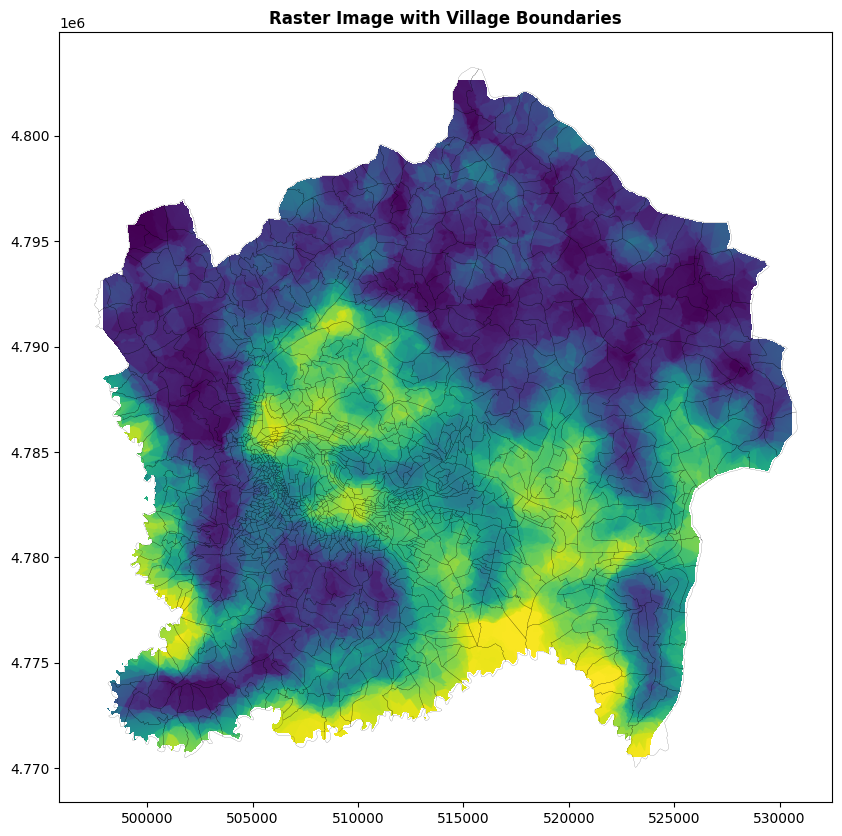

In [51]:
# Load raster data using Rasterio
with rasterio.open(raster) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the raster image
    show(src, ax=ax, title="Raster Image with Village Boundaries")
    
    # Overlay village boundaries
    villages.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.1)
    
    # Show the plot
    plt.show()


In [39]:

# Extract aggregated raster values for each village (mean, sum, min, max, etc.)
# You can change the 'stats' parameter to other types of stats like ['mean', 'sum', 'min', 'max']
zonal_stats = zonal_stats(villages, raster, stats=['mean', 'sum'], geojson_out=True)

# Create a GeoDataFrame from the result with aggregated values
zonal_gdf = gpd.GeoDataFrame.from_features(zonal_stats)

In [41]:
zonal_gdf.head()

,geometry,fid1,fid_,OBJECTID,SUM_Popula,SUM_Househ,District,Sector_1,Cellule_1,Population,Household,Village,UR_Name,mean,sum
0,"POLYGON Z ((505804.107 4784697.389 0.000, 5058...",0,0,1,730.0,151.0,Nyarugenge,Gitega,Akabahizi,730.0,151.0,Gihanga,NyarugengeUrban area,0.536800,145.472672
1,"POLYGON Z ((505725.350 4785070.958 0.000, 5057...",0,0,2,667.0,187.0,Nyarugenge,Gitega,Akabahizi,334.0,97.0,Iterambere,NyarugengeUrban area,0.795539,582.334595
2,"POLYGON Z ((505689.339 4785047.219 0.000, 5057...",0,0,3,670.0,160.0,Nyarugenge,Gitega,Akabahizi,670.0,160.0,Izuba,NyarugengeUrban area,0.799484,110.328796
3,"POLYGON Z ((506082.393 4784751.671 0.000, 5060...",0,0,4,293.0,72.0,Nyarugenge,Gitega,Akabahizi,293.0,72.0,Nyaburanga,NyarugengeUrban area,0.642442,213.933167
4,"POLYGON Z ((505779.444 4784753.812 0.000, 5057...",0,0,5,719.0,189.0,Nyarugenge,Gitega,Akabahizi,472.0,125.0,Nyenyeri,NyarugengeUrban area,0.602369,83.729279


In [45]:
# Optional: Save the result to a new shapefile or GeoJSON
zonal_gdf.to_file("/home/jupyter-edufitimana/Data/village_sus.shp")

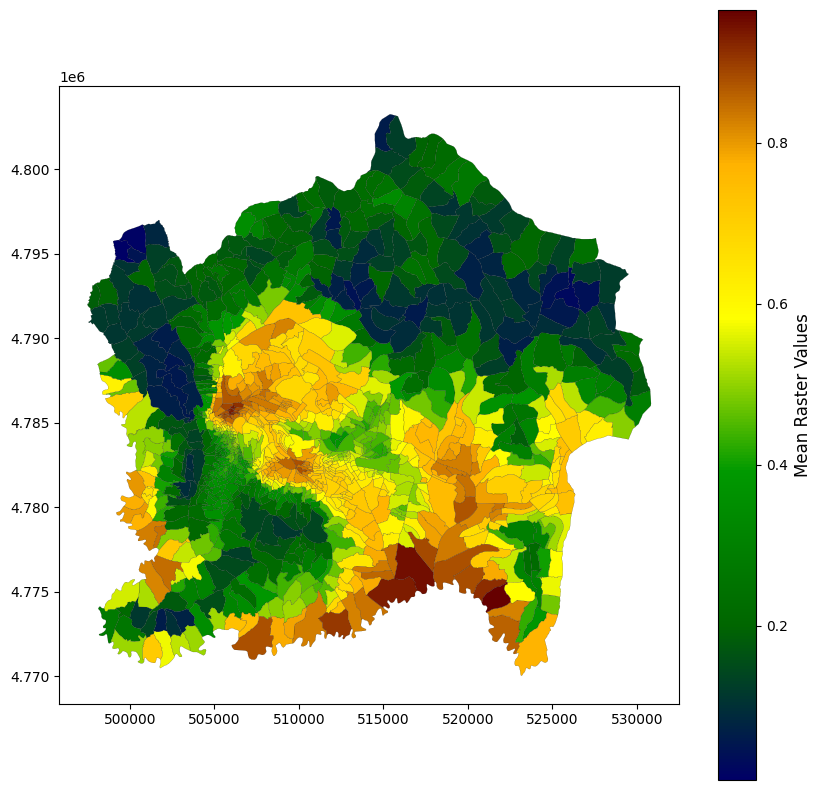

In [101]:
# Remove any null values in the 'mean' column (if any)
zonal_gdf = zonal_gdf.dropna(subset=['mean'])

# Plotting the result with a color ramp based on 'mean' values
fig, ax = plt.subplots(figsize=(10, 10))


from matplotlib.colors import LinearSegmentedColormap


# Define the colors from dark blue (low) to brown (high)
colors = [(0, 0, 0.4),  # Dark Blue
          (0, 0.4, 0),  # Dark Green
          (0, 0.6, 0),  # Greenish
          (1, 1, 0),    # Yellow
          (1, 0.7, 0),  # Orange
          (0.4, 0, 0)]  # Brown

# Create the custom colormap
cmap_name = 'custom_gradient'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)
# Define colors for the gradient
#colors = ["#ffcc99", "#ff9966", "#ff6633", "#ff3300"]  # Light to dark orange

# Create the colormap
#cmap = LinearSegmentedColormap.from_list("custom_orange", colors)

# Define a color ramp (colormap)
# You can adjust this to any color scheme you like
#colors = ['green', 'yellow', 'orange', 'red', 'maroon']  # Example color scheme
#cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

# Define a color ramp (using matplotlib's colormap)
#cmap = plt.cm.plasma  # Choose a colormap like 'viridis', 'plasma', 'inferno', etc.
#norm = mpl.colors.Normalize(vmin=zonal_gdf['mean'].min(), vmax=zonal_gdf['mean'].max())

# Create a color bar for the ramp
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Plot the village boundaries with color based on mean values
zonal_gdf.plot(column='mean', cmap=cmap, linewidth=0.1, edgecolor='black', ax=ax, legend=False, norm=norm)

# Add the color bar (the color ramp)
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Mean Raster Values', fontsize=12)

# Add title and labels
#ax.set_title('Susceptibility per Village', fontsize=15)
#ax.set_xlabel('Longitude')
#ax.set_ylabel('Latitude')

# Show the plot
plt.show()

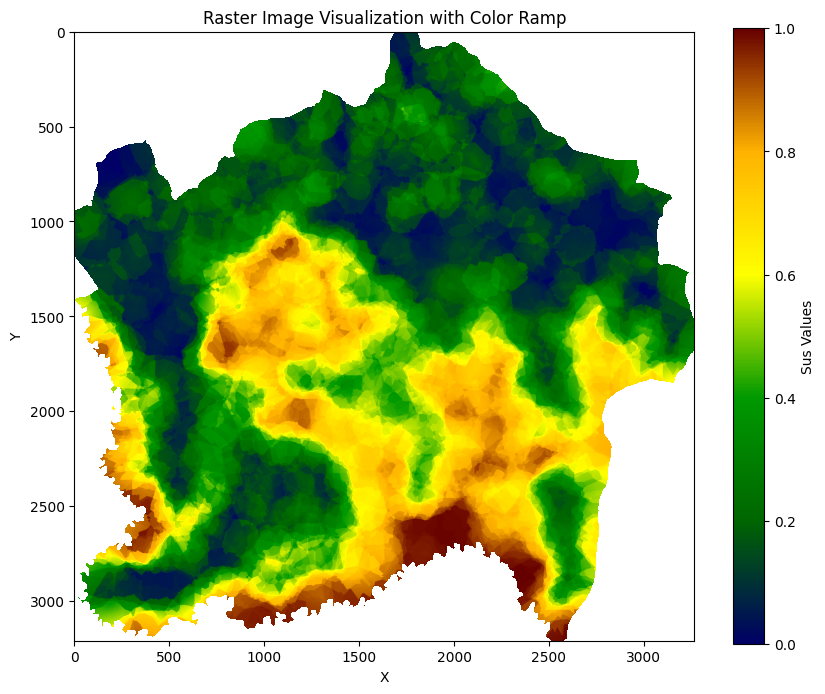

In [103]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Path to the raster file
raster_file = '/home/jupyter-edufitimana/Data/suscept_nor.tif'

# Open the raster file
with rasterio.open(raster_file) as src:
    # Read the first band
    raster_data = src.read(1)
    
    # Mask invalid values (optional, for better visualization)
    raster_data = np.ma.masked_equal(raster_data, src.nodata)

# Define the colors from dark blue (low) to brown (high)
colors = [(0, 0, 0.4),  # Dark Blue
          (0, 0.4, 0),  # Dark Green
          (0, 0.6, 0),  # Greenish
          (1, 1, 0),    # Yellow
          (1, 0.7, 0),  # Orange
          (0.4, 0, 0)]  # Brown

# Create the custom colormap
cmap_name = 'custom_gradient'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# Plot the raster with the color ramp
plt.figure(figsize=(10, 8))
plt.imshow(raster_data, cmap=cmap)
plt.colorbar(label='Sus Values')
plt.title('Raster Image Visualization with Color Ramp')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


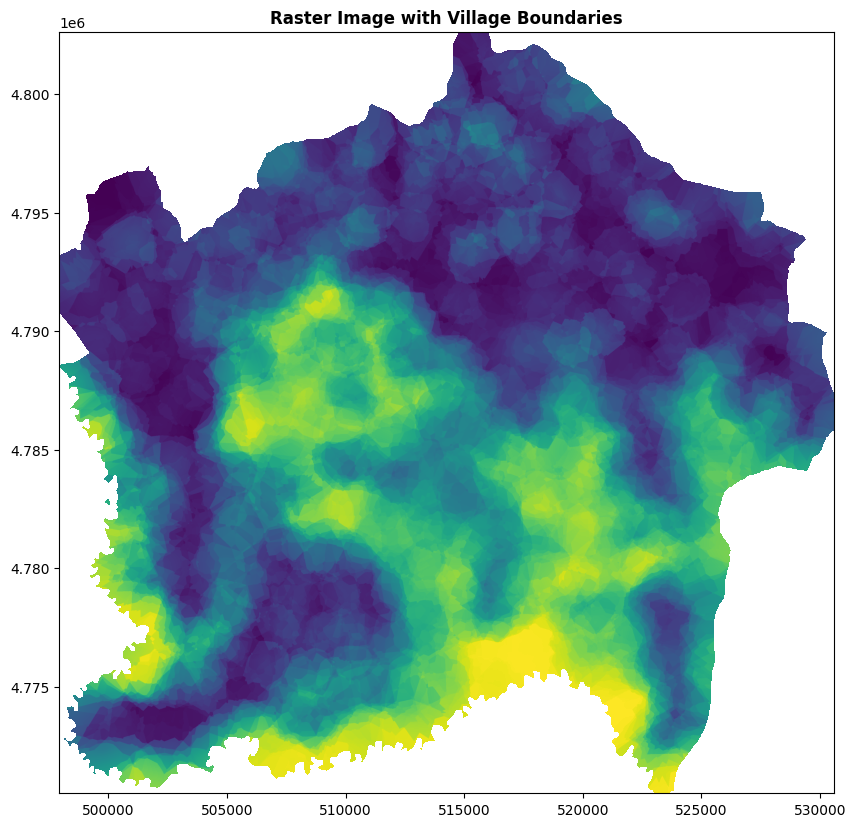

In [55]:
# Load raster data using Rasterio
with rasterio.open(raster) as src:
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the raster image
    show(src, ax=ax, title="Raster Image with Village Boundaries")
    
    # Overlay village boundaries
    #villages.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.1)
    
    # Show the plot
    plt.show()

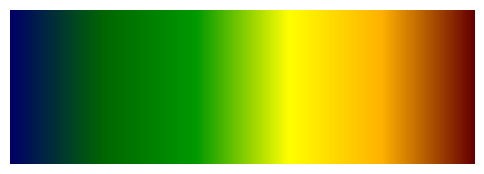

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Define the colors from dark blue, to yellow, to orange, to brown
colors = [(0, 0, 0.4),  # Dark Blue
          #(0, 0.5, 1),  # Lighter Blue
          (0, 0.4, 0),
          (0, 0.6, 0),  # Greenish
          (1, 1, 0),  # Yellow
          (1, 0.7, 0),  # Orange
          (0.4, 0, 0)]  # Brown

# Create the custom colormap
cmap_name = 'custom_gradient'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# Generate data for visualization
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

# Plot the color gradient
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=cm)
ax.set_axis_off()

plt.show()
